My project will explore the topic of house construction prices in the United States from 1973 to present day.
I will use this project to project when the next best time to build a new house might be, and approximate
how much money that house would cost on average to build in the United States. This project may also
project when the next economic downturn will be, depending on how the model works out. This project
will be interesting because it will likely clearly demonstrate the recessions during the terms of Presidents
Nixon, Ford, Carter, Reagan, Bush 41, Bush 43, Obama, and most recently the COVID-19 recession during
President Trump and President Biden’s terms, and the effects of those recessions on the housing market. I
will obtain this data from the United State Census Bureau, in a monthly form using their Excel spreadsheet
export function. This data can be obtained publicly at https://www.census.gov/construction/cpi/.

I will compare this data for house construction costs to material costs such as lumber, which I have obtained from https://www.macrotrends.net/futures/lumber in a spreadsheet. The spreadsheet didn't come out perfectly how I would have liked, so I averaged it out by month. Both CSVs will be available on my GitHub page, located at www.GitHub.com/JacobPeterson7.

Comparing the data of house construction prices to material costs will be a good way to predict the price to build houses in the future, as well as predicting the price of materials in the future. Later on in my project, I will compare house construction prices to T Bills to compare the price of building a home to the rate of inflation, or the rate at which the price of the dollar changes, which at the time of writing this, it is likely to be high from what I have heard in the news and other sources. 

In [9]:
import pandas as pd
project_data=pd.read_csv('/users/admin/Desktop/Econ411/project_data.csv', index_col = 'Date')
print(project_data)

        Real Prices  Nominal Prices
Date                               
Jan-73         18.9            18.3
Feb-73         18.9            18.3
Mar-73         19.1            18.3
Apr-73         19.3            18.7
May-73         19.5            18.7
...             ...             ...
21-Mar        148.7           149.8
21-Apr        150.5           151.4
21-May        152.6           153.8
21-Jun        153.9           155.2
21-Jul        156.5           157.9

[583 rows x 2 columns]


In [2]:
x = 2021 - 1973
OctMinJan = 10 - 1
MonthsInYear = 12

Current_Month = (x * MonthsInYear) + OctMinJan

print(Current_Month)

585


October 2021 would be month 585 if we had data for it, but unfortunately we do **not** have the data for October of 2021. However, this gives us a good estimate of what the price is to build a house today. We have the data for lumber and house construction prices from January of 1973 to July of 2021. This means there are 582 months of usable data to work with. 

In [7]:
lumber_data=pd.read_csv('/users/admin/Desktop/Econ411/lumber_prices2.csv',index_col='Date')
print(lumber_data)

          Real Price of Lumber
Date                          
1/1/1973            145.371429
2/1/1973            156.710526
3/1/1973            164.972727
4/1/1973            157.657500
5/1/1973            134.140909
...                        ...
3/1/2021            898.956522
4/1/2021           1240.504762
5/1/2021           1439.070000
6/1/2021           1016.010909
7/1/2021            658.123809

[583 rows x 1 columns]


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<ipython-input-5-2ded3d7d8bc0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


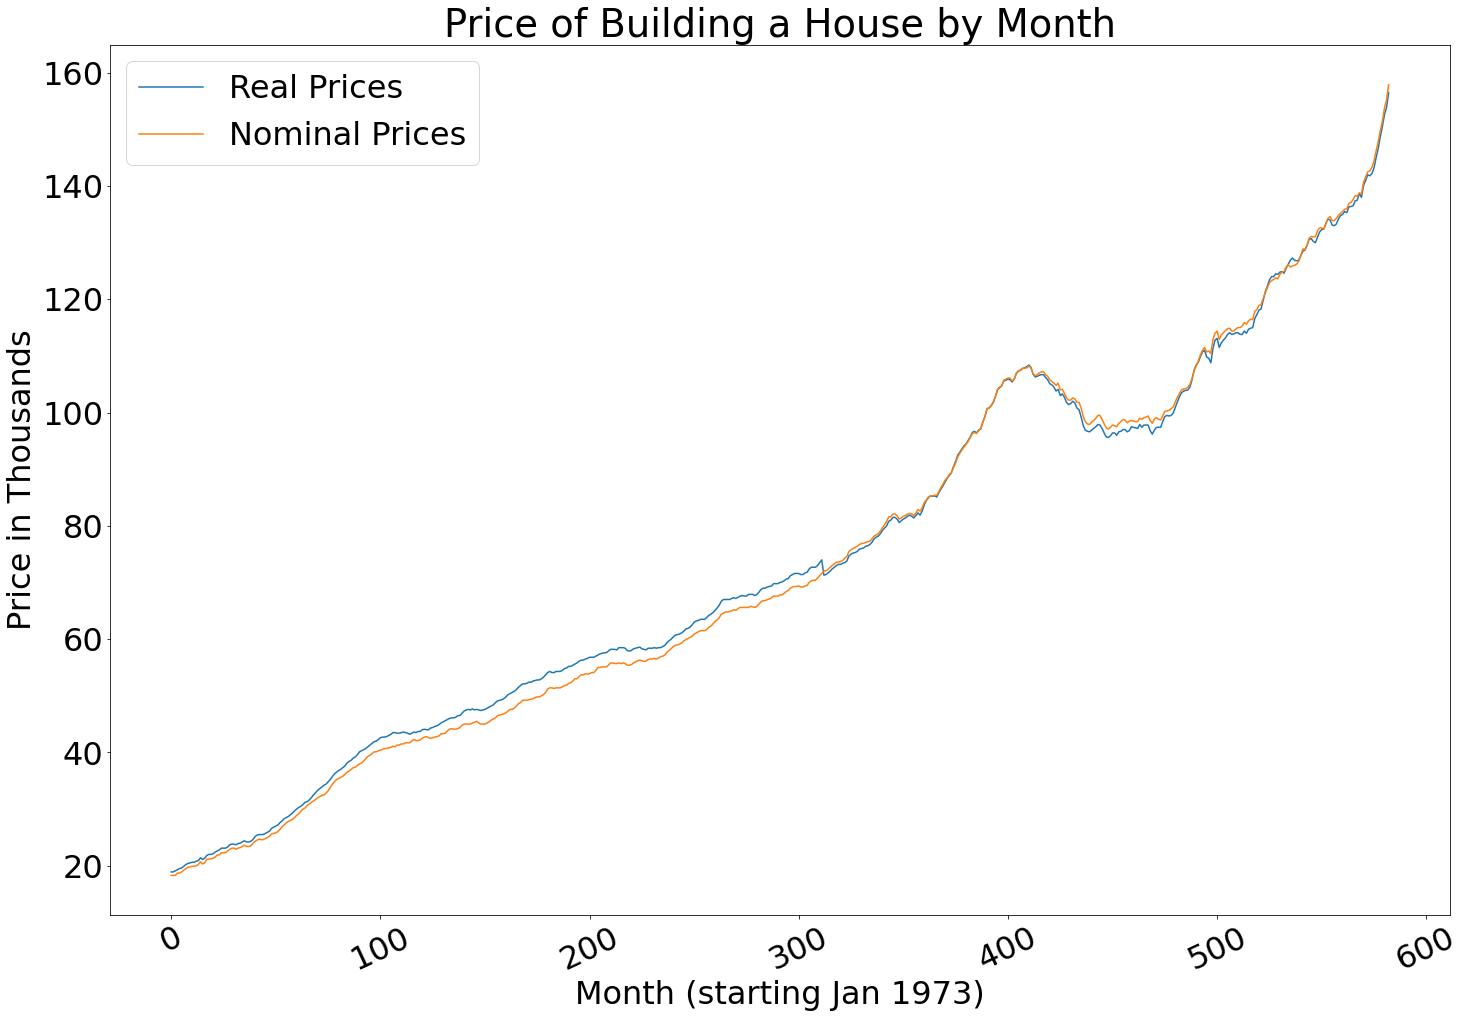

In [5]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
project_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1973)')
plt.xticks(rotation = 25)
plt.ylabel('Price in Thousands')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Price of Building a House by Month")
plt.show()
plt.close()

As we can see in the graph above, Real Prices _slightly_ edge out nominal prices in the beginning. This holds true until approximately month 415, when nominal prices finally rise above Real Prices. After (approximately) month 415, Real Prices and Nominal Prices are very close to the same the same, with minor variations each month and constantly switching in position regarding which price is higher versus which price is lower. 

<ipython-input-18-a1a377ecec31>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


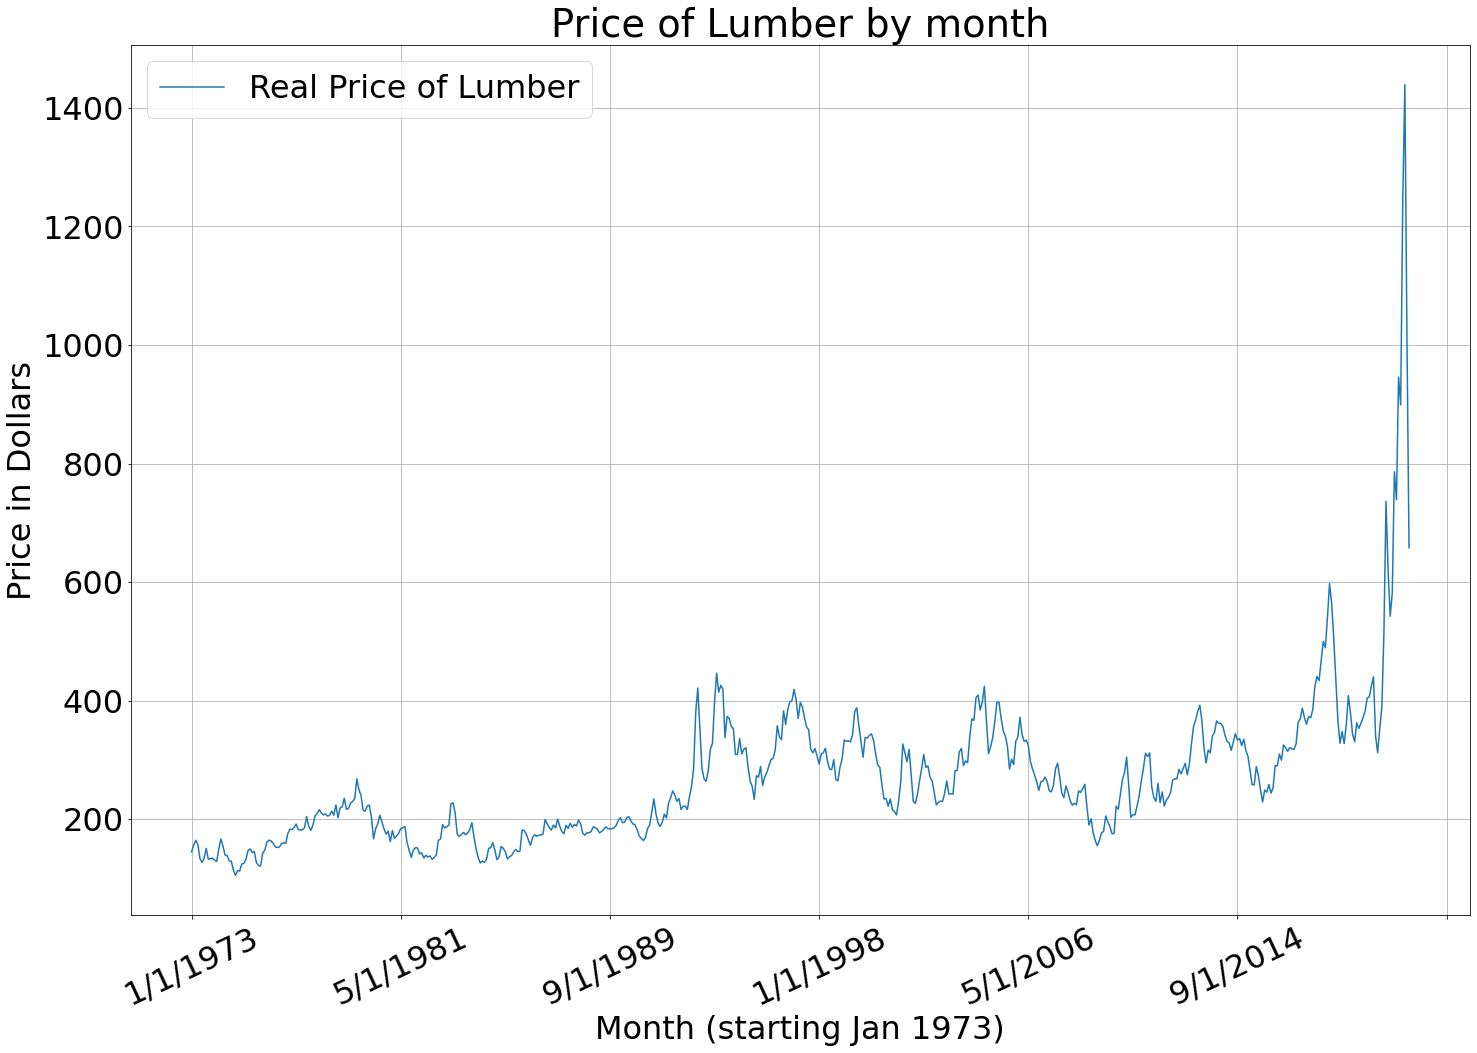

In [18]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
lumber_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1973)')
plt.xticks(rotation = 25)
plt.ylabel('Price in Dollars')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])  
plt.grid(True)

plt.title("Price of Lumber by month")
plt.show()
plt.close()

As we can see in this graph above, lumber prices have increased and decreased sporatically throughout the past forty eight years. According to the graph, the prices hovered around $150 to $400 for most of the time that is graphed. However, in about 2018, prices rose sharply to $600, then came back down. Then, at approximately month 570, the price of lumber skyrocketed to over $1400. Right now, they are decreasing sharply after a very high increase at approximately month 570. This means the price will likely stabilize soon.

Because we can also see that lumber prices have a **sharp** dropoff at the very end of the line that represents them, meaning the price to build a house will very likey go down simply due to the huge drop in lumber prices.

Now we will be plotting the change in prices of building a house and lumber by percent per month. This will give us an idea of how the prices of constructing a house and of purchasing lumber have been changing constantly among the past forty eight years. This graph will show us this on a monthly basis.

In [10]:
lumber_price_change_data = lumber_data.pct_change() * 100

In [11]:
housing_price_change_data = project_data.pct_change() * 100

<ipython-input-15-b401a6f07178>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


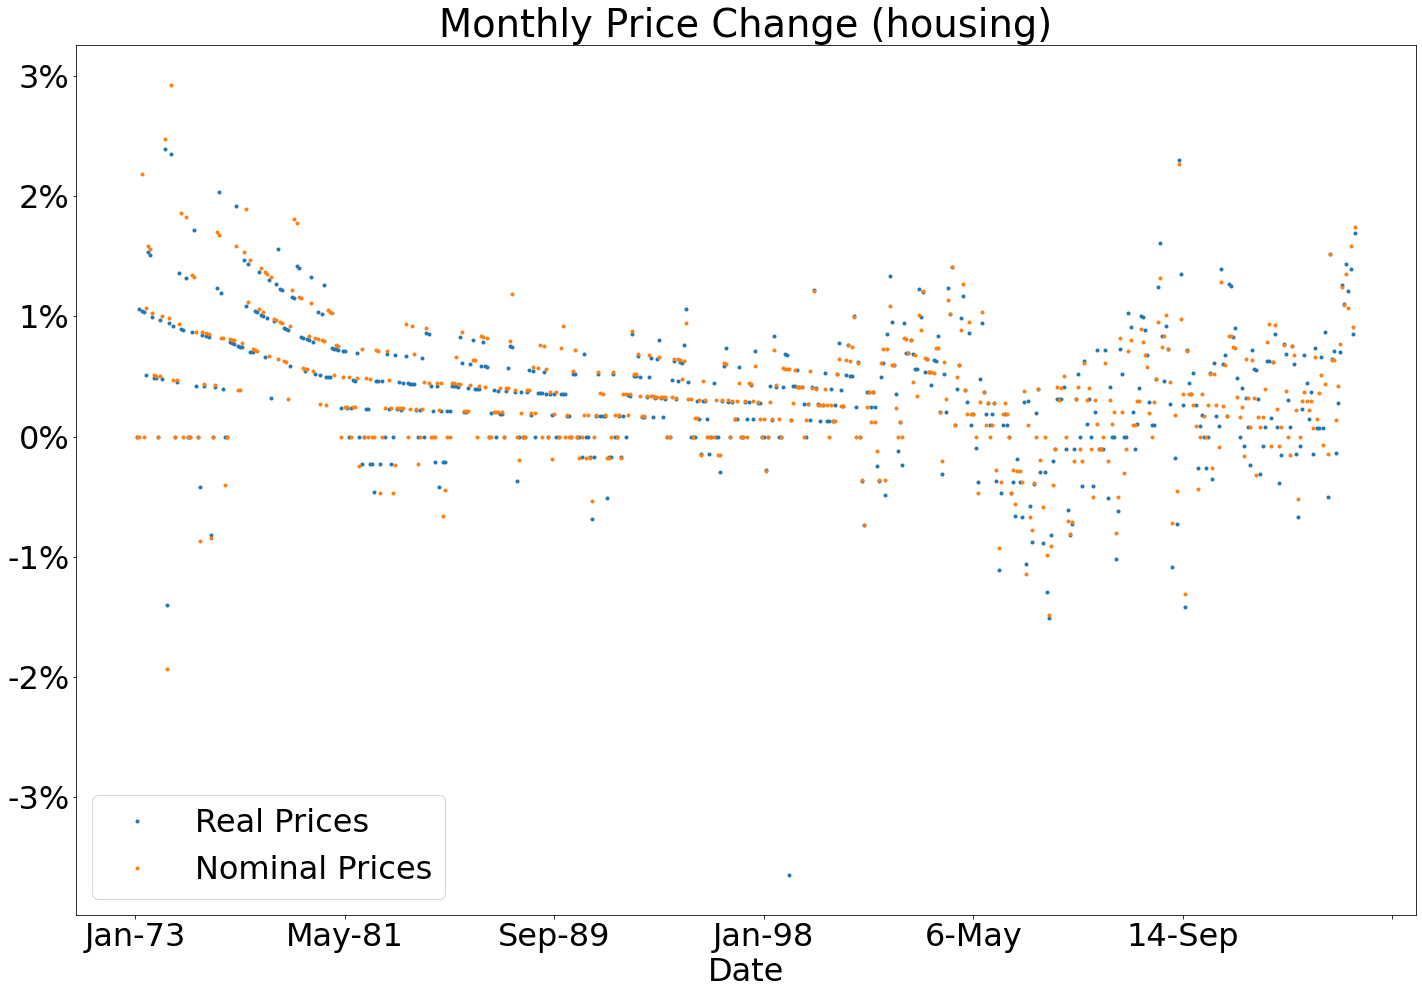

In [15]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in housing_price_change_data:
    housing_price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (housing)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We are able to visualize in this graph the percent change over time of the real and nominal prices for the construction of a home. The visualization tells us that the change in prices varies from month to month, which is expected. However, there are sometimes where the change is close to being zero percent. However, the price to construct a home usually increases in price, and only decreases every once in a while. We can also see on the graph that the price has been increasing steadily recently, increasing approximately 1.5% to 2% every month.

<ipython-input-16-358d3915e1be>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


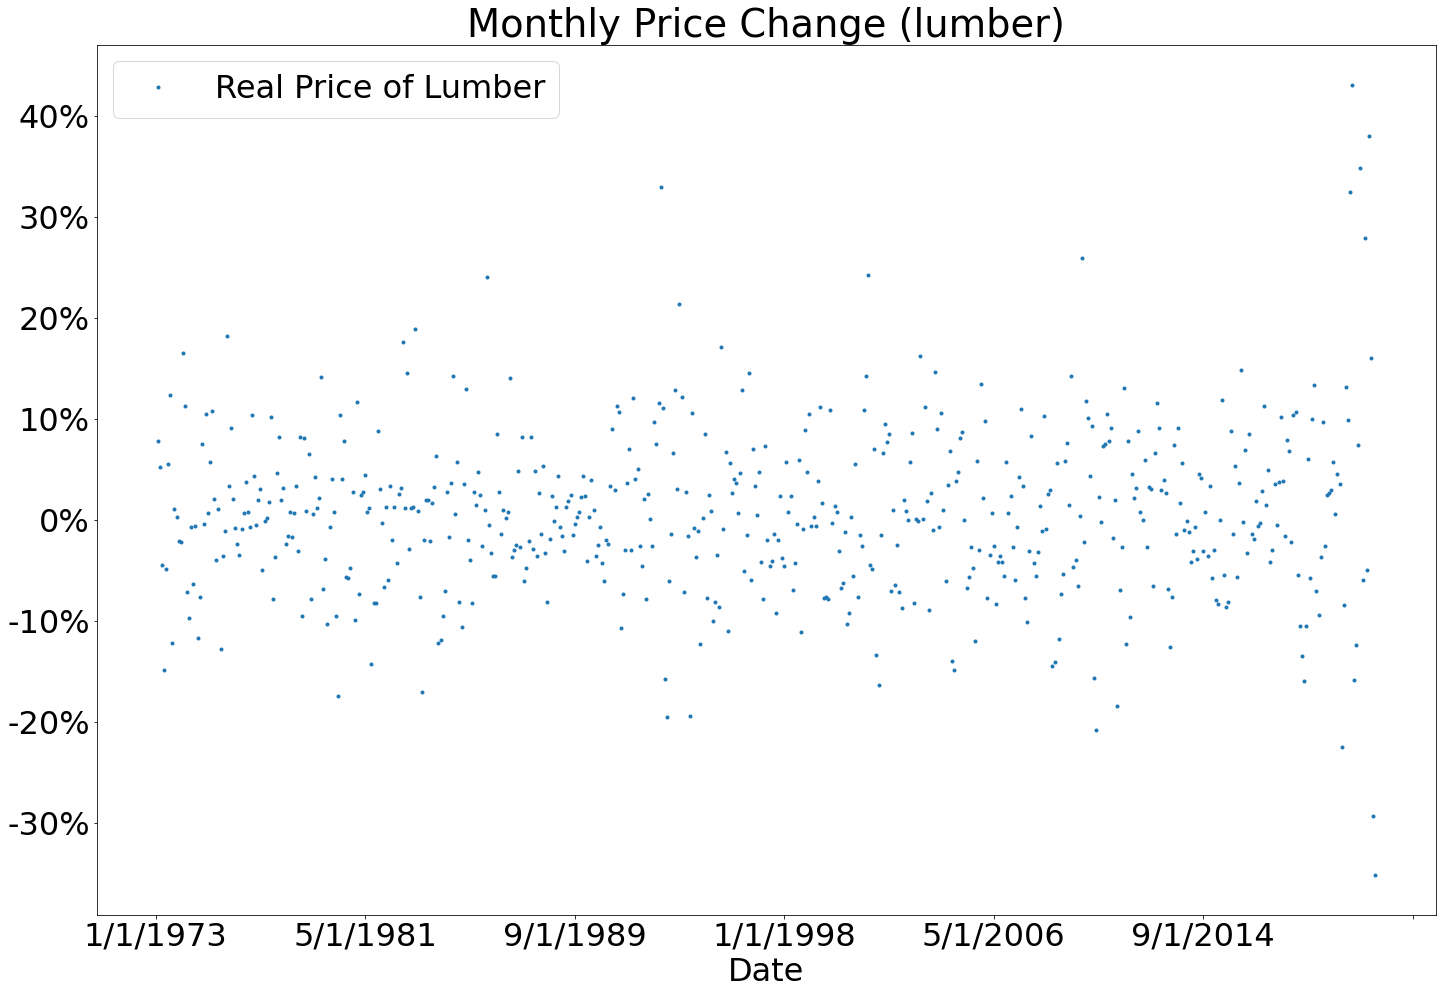

In [16]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in lumber_price_change_data:
    lumber_price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (lumber)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

With lumber, it's a different story as compared to the price of constructing a home. The price is fluctuates quite a bit, as the maximium positive change is over 40%, and the maximium negative change is over a 30% decrease. There are many months in which the price of lumber does not change very much, but there are also months in which there are changes in price of lumber of over a whopping forty percent increase. There are also months where there's over a thirty percent decrease in the price of lumber. This means that lumber is extremely volatile; the price fluctuates a lot from month to month. As of recently, which is depicted on the right side of the graph above, there have been higher fluctuations in price from month to month, as the highest changes both negative and positive have occurred in the past seven years. These are not present very often in the data leading up to present day, as the highest percent change was just around 30%, and it's clear this was an outlier. The huge price swings that we are seeing now are odd for the prices of lumber.

This project proposal is due October 3, 2021. The next time you look at this data, it will be in my rough draft assignment. My rough draft assignment is due November 24, 2021. The final time you look at my data will be when I am presenting it to the entire ECON 411 class. This will happen sometime during Final's week, week 16, which will span from December 6, 2021, to December 10, 2021.